1. Gradient Descent

1.1 Fundamentals
Gradient Descent is an iterative optimization technique to minimize a cost function J(θ).

Key Steps:

Initialize Parameters: Start with random or arbitrary values for the parameters to be optimized (e.g., θ).

Compute Gradient: Calculate the gradient of the cost function with respect to the parameters. The gradient tells us the direction of steepest ascent.

Update Parameters: Move the parameters in the opposite direction of the gradient to reduce the cost:

θ=θ−α⋅ ∂J(θ)/∂θ

α: Learning rate (step size).

Repeat: Iterate until the change in the cost function is small or a maximum number of iterations is reached.



1.2 Variants of Gradient Descent

Batch Gradient Descent:Uses the entire dataset to compute the gradient.

Pro: Stable convergence.

Con: Computationally expensive for large datasets.


Stochastic Gradient Descent (SGD):Uses a single data point to compute the gradient.

Pro: Faster updates.

Con: Noisy updates can cause oscillations around the minimum.


Mini-Batch Gradient Descent:Uses small subsets (batches) of the data to compute the gradient.

Pro: Balances speed and stability.

Commonly used in modern machine learning.


Optimized x: 0.00014272476927059603


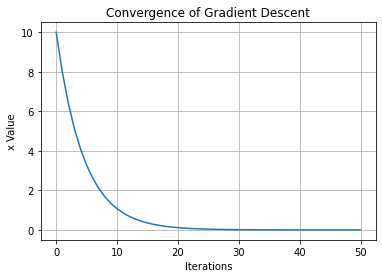

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to minimize
def cost_function(x):
    return x**2

# Gradient of the function
def gradient(x):
    return 2 * x

# Gradient Descent Implementation
def gradient_descent(start_x, learning_rate, iterations):
    x = start_x
    history = [x]  # Track the value of x over iterations
    
    for _ in range(iterations):
        grad = gradient(x)  # Compute gradient
        x = x - learning_rate * grad  # Update x
        history.append(x)
    
    return x, history

# Parameters
start_x = 10  # Initial guess
learning_rate = 0.1  # Step size
iterations = 50  # Number of iterations

# Run Gradient Descent
final_x, history = gradient_descent(start_x, learning_rate, iterations)
print("Optimized x:", final_x)

# Plot Convergence
plt.plot(history)
plt.title("Convergence of Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("x Value")
plt.grid()
plt.show()


1.4 Observations

The plot shows how x moves closer to 0, the minimum of f(x)=x ** 2

The learning rate (α) determines the step size:

If too small: Slow convergence.

If too large: Overshooting or divergence.

2. Regularization


2.1 Why Regularization?

In machine learning, models can overfit the training data, leading to poor generalization on unseen data. Regularization penalizes large weights, making the model simpler and less prone to overfitting.

2.2 Types of Regularization

L1 Regularization (Lasso):

Adds the sum of the absolute values of the coefficients to the loss function:

J(θ) = Loss + 𝜆⋅∑∣𝜃𝑖∣

Encourages sparsity by driving some coefficients to zero.

Useful for feature selection.

L2 Regularization (Ridge):

Adds the sum of the squared coefficients to the loss function:

J(θ)=Loss+λ⋅∑θ i**2
​
 
Shrinks weights but doesn’t make them zero.

Useful for reducing the magnitude of coefficients.

In [3]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
true_coeffs = np.array([1.5, -2.0, 0.0, 0.0, 0.5])  # Sparse coefficients
y = X @ true_coeffs + np.random.randn(100) * 0.1  # Add noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0)  # Regularization strength
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)

# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)  # Regularization strength
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)

# Print results
print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)
print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)


Ridge Coefficients: [ 1.29638394 -1.7934596   0.02295476  0.05337212  0.40296375]
Lasso Coefficients: [ 0.43275758 -1.06835263 -0.          0.          0.        ]
Ridge MSE: 0.025791055098657235
Lasso MSE: 0.2881444537118041


2.4 Observations

Ridge (L2 Regularization):

Shrinks coefficients uniformly, but keeps all features. Suitable when all features are useful.

Lasso (L1 Regularization):

Drives some coefficients to zero, effectively selecting features. Suitable for sparse models where some features are irrelevant.